In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

plt.rcParams["figure.figsize"] = [12.00, 6.75]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Frekvensrespons og middelverdifiltre

* **Emne AIS2201 - Signalbehandling**
* **Uke 42, 2023**
* **Relevant Pensum:**
    * Kapittel 5.9 - 5.10 i Understanding Digital Signal Processing
    * Differansefilter kan leses mer om i kapittel 7.1
* **Underviser: Kai Erik Hoff**

# Tema

* Repetisjon frekvensrespons, styrkegradsrespons og faserespons
* Utregning av fekvensrespons med DTFT
* Analyse og manipulasjon av middelverdifiltre

# Styrkegrad- og faserespons

* Frekvensresponsen $H\left(\hat{\omega}\right)$ er en *kompleks funksjon* som forteller hvordan filteret vil påvirke enhver ren sinussekvens $x[n] = A\cdot \cos(\hat{\omega}_0\cdot n + \phi)$.
<img src="Figurer/11_Frekvensrespons/Fig3_LTI_SInusoid.png" style="width: 80%; margin-left: 100px" />

* Når vi analyserer filtre er det gunstig å kunne studere skaleringen og forskyvningen hver for seg. Disse to "komponentene" er kjent som amplituderesponsen og faseresponsen til et filter.
    * **Styrkegradsrespons** $\left|H\left(\hat{\omega}\right)\right|$
        * Forteller hvor mye en sinussekvens forsterkes/dempes, gitt digital frekvens $\hat{\omega}$.
    * **Faserespons** $\angle H\left(\hat{\omega}\right)$
        * Forteller hvor mange radianer sinussekvensen ut av filteret er forskjøvet i forhold til inngangssignalet, gitt digital frekvens $\hat{\omega}$.

Output()

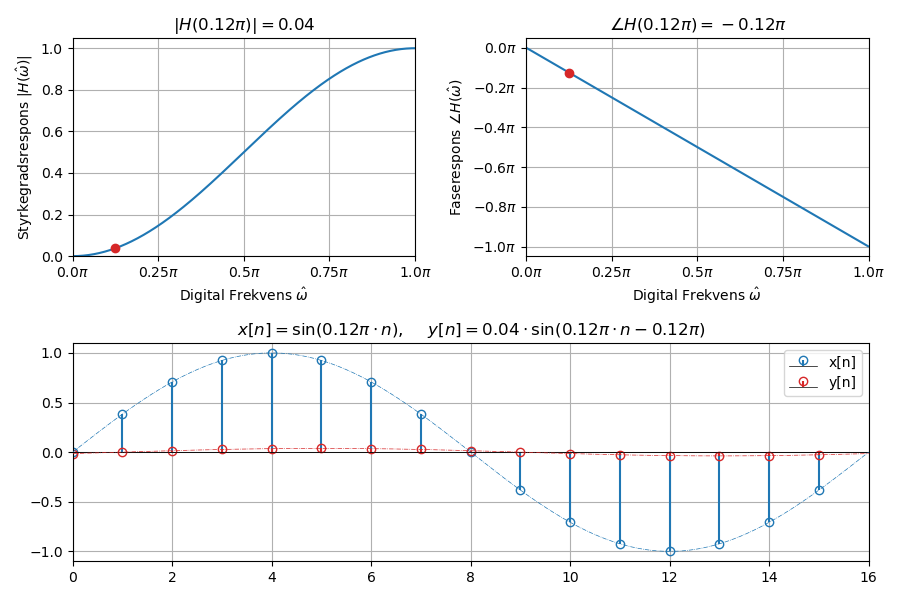

In [2]:
from Kildekode._11_Frekvensrespons import FreqRespDemo
hn = np.array([-0.25, 0.5, -0.25])
FreqRespDemo(hn, figsize=(9,6), fig_num=1);

# Utregning av frekvensrespons

* Diskrét-Tids Fouriertransformasjon (DTFT) av impulsresponesn $h[n]$ gir et *kontinuerlig* funksjonsuttrykk for filterets frekvensrespons.

* Formel for *kausale* filtre:

### \begin{align}H\left(\hat{\omega}\right) &= \sum_{n=0}^{\infty} h[n]\cdot e^{-j\hat{\omega}\cdot n}\\ &= h[0]\cdot e^{-j0\hat{\omega}}+h[1]\cdot e^{-j1\hat{\omega}}+h[2]\cdot e^{-j2\hat{\omega}}+\ldots \end{align}

## Regneeksempel 3
* Et FIR filter er gitt ved impulsresponsen $h[n] =-\frac{1}{4}\delta[n]+ \frac{1}{2}\delta[n-1]-\frac{1}{4}\delta[n-2]$
    * Prøv å klassifisere filtreet (HP /LP) ved å studere impulsresponsen.
    * Finn et funksjonsuttrykk for filterets frekvensrespons $H\left(\hat{\omega}\right)$.
    * Bruk $H\left(\hat{\omega}\right)$ til å bekrefte/avkrefte filterklassifiseringen.

## Regneeksempel 3 frekvensrespons


Text(0.5, 0, 'Digital Frekvens $\\hat{\\omega} \\ (\\times \\pi)$')

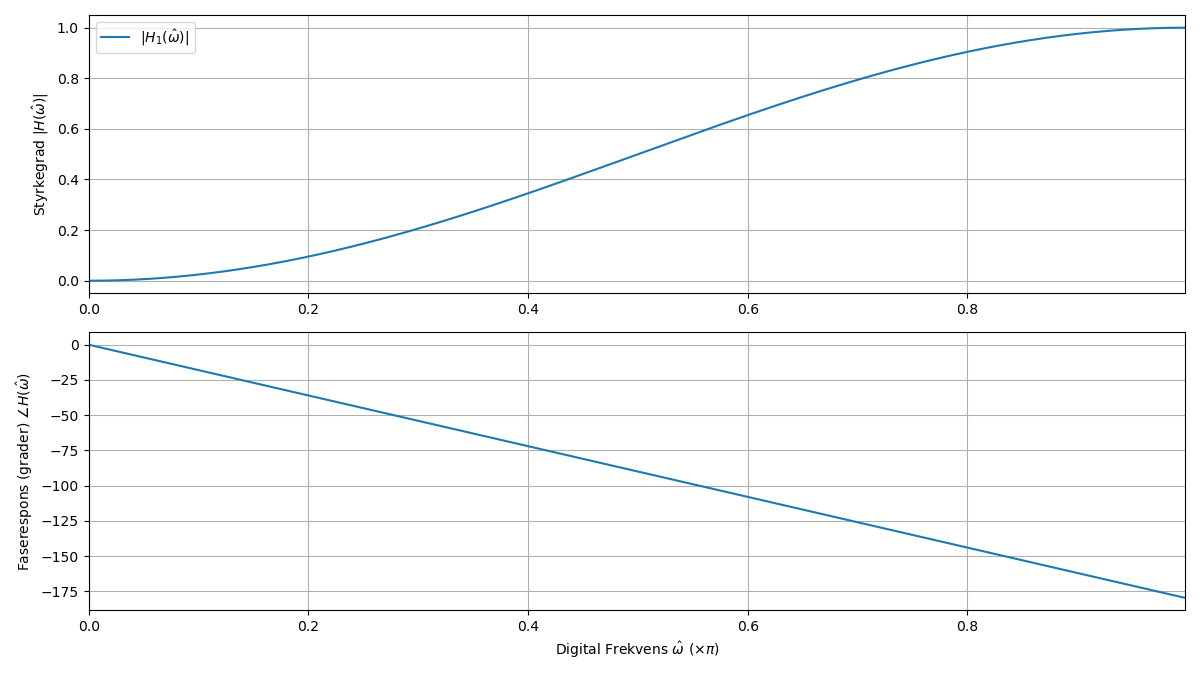

In [3]:
hn = np.array([-0.25, 0.5, -0.25]) # Filter fra regneeksempel 3
w, Hw = sig.freqz(b = hn)

Hw_amp = np.abs(Hw)
Hw_phase = np.unwrap(np.angle(Hw))

#----------------------------
# Plotting av frekvensrespons
# ---------------------------
plt.close(2); plt.figure(2)
plt.subplot(2,1,1)
plt.plot(w/pi, Hw_amp, label=r'$|H_1(\hat{\omega})|$')
plt.legend()
plt.ylabel(r'Styrkegrad $|H(\hat{\omega})|$')
plt.subplot(2,1,2)
plt.plot(w/pi, np.rad2deg(Hw_phase), label=r'$|H(\hat{\omega})|$')
plt.ylabel(r'Faserespons (grader) $\angle H(\hat{\omega})$')
plt.xlabel(r'Digital Frekvens $\hat{\omega} \ (\times \pi)$')

## Demo: frekvensrespons

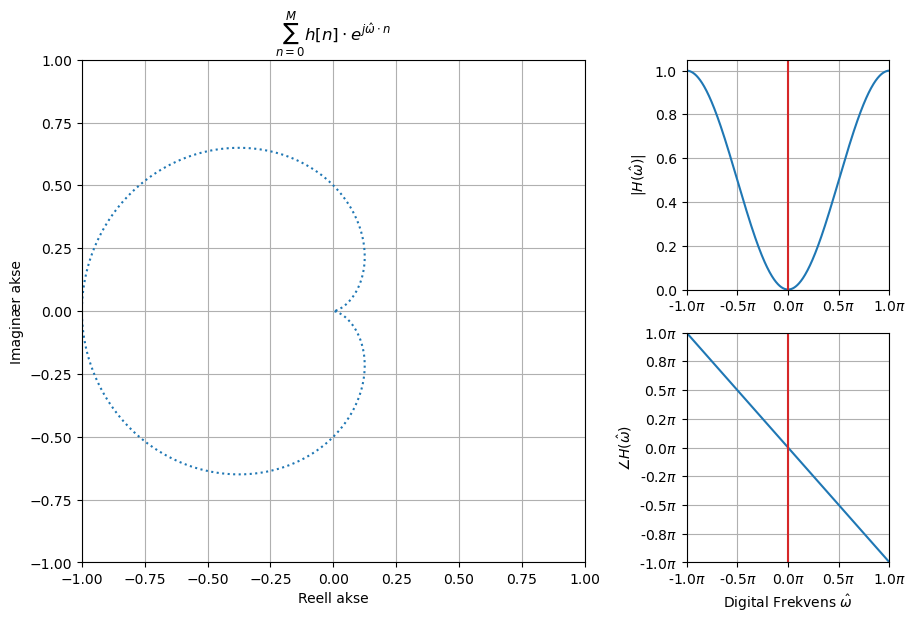

Output()

In [1]:
from Kildekode._11_Frekvensrespons import DTFT_demo
hn = np.array([-0.25, 0.5, -0.25]) # Impulsrespons fra regneeksempel 3
DTFT_demo(hn, fig_num = 3, figsize=(9,6));

# Analyse av middelverdifiltre

* Regner ut gjennomsnittsverdien til de $L$ nyeste samplene av inngangssignalet $x[n]$.
* Impulsrespons middelverdifiltre:
$$h[n] = \frac{1}{L}(u[n] - u[n-L])$$

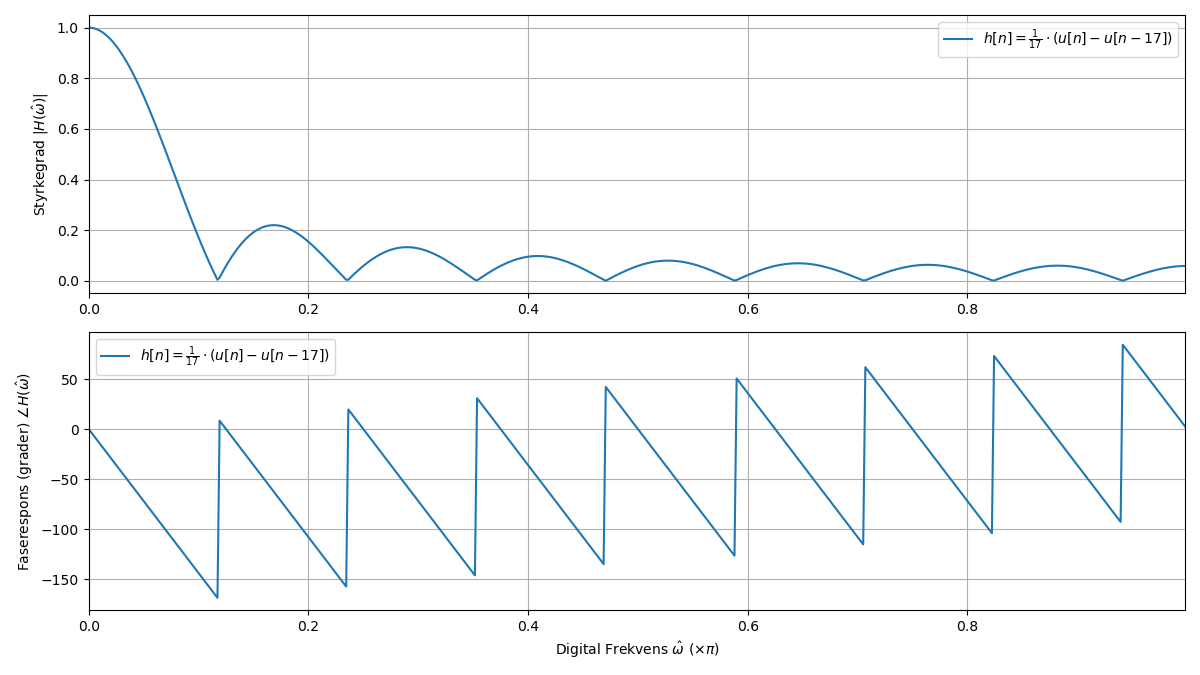

In [5]:
L = 17
hn = np.ones(L)/L # MIddelverdifilter med lengde L
w, Hw = sig.freqz(b = hn)

Hw_amp = np.abs(Hw)
Hw_phase = np.unwrap(np.angle(Hw))

#----------------------------
# Plotting av frekvensrespons
# ---------------------------
plt.close(4); plt.figure(4)
plt.subplot(2,1,1)
plt.plot(w/pi, Hw_amp, label=r'$h[n]=\frac{1}{%d}\cdot (u[n] - u[n-{%d}])$'%(L,L))
plt.legend()
plt.ylabel(r'Styrkegrad $|H(\hat{\omega})|$')
plt.subplot(2,1,2)
plt.plot(w/pi, np.rad2deg(Hw_phase), label=r'$h[n]=\frac{1}{%d}\cdot (u[n] - u[n-{%d}])$'%(L,L))
plt.ylabel(r'Faserespons (grader) $\angle H(\hat{\omega})$')
plt.xlabel(r'Digital Frekvens $\hat{\omega} \ (\times \pi)$')
plt.legend()

### Observasjoner
* Middelverdifiltre er lavpassfilter
* Filterorden påvirker hvor "smalt" passbåndet er
* Lineær fase i passbåndet (uniform *group delay*)
* Ikke imponerende stoppbåndsdemping

# "Forbedret middelverdifilter"
* Frekvensegenskapene til middelverdifilteret kan tilpasses med f.eks. en vindusfunksjon

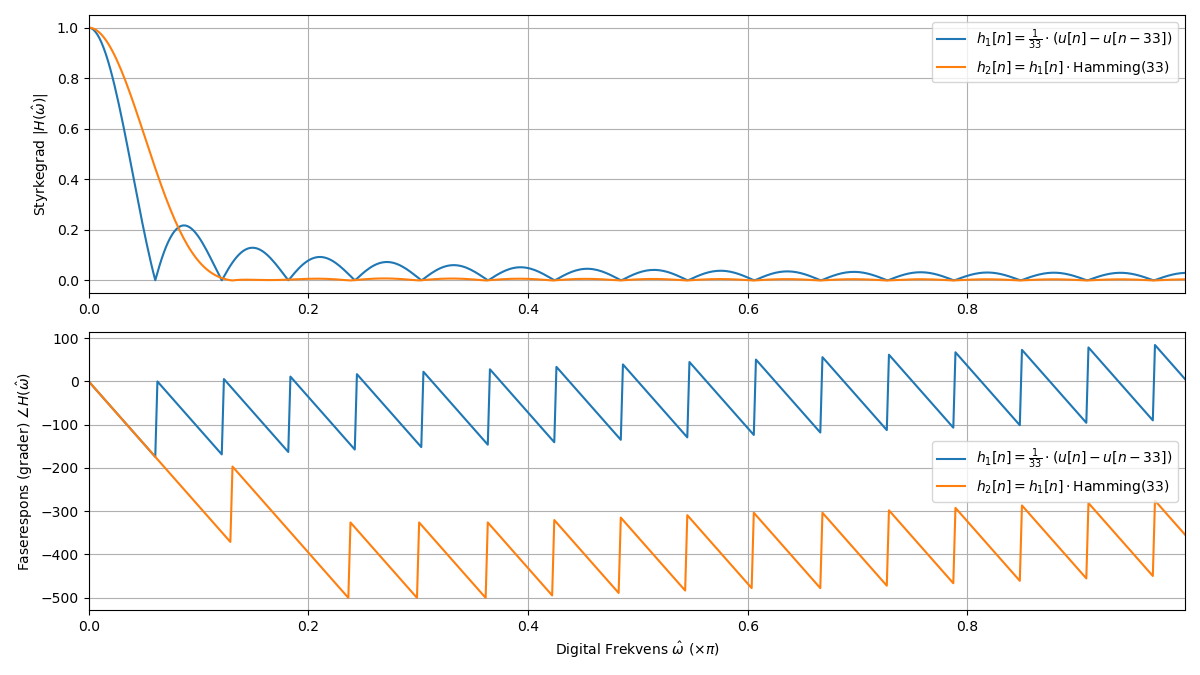

In [6]:
import scipy.signal as sig
L = 33
h1n = np.ones(L)/L # MIddelverdifilter med lengde L
h2n = h1n*L*sig.hamming(L)/sum(sig.hamming(L)) # Modifisert middelverdifilter
w, H1w = sig.freqz(b = h1n)
w, H2w = sig.freqz(b = h2n)

H1w_amp = np.abs(H1w)
H1w_phase = np.unwrap(np.angle(H1w))
H2w_amp = np.abs(H2w)
H2w_phase = np.unwrap(np.angle(H2w))

#----------------------------
# Plotting av frekvensrespons
# ---------------------------
plt.close(5); plt.figure(5)
plt.subplot(2,1,1)
plt.plot(w/pi, H1w_amp, label=r'$h_1[n]=\frac{1}{%d}\cdot (u[n] - u[n-{%d}])$'%(L,L))
plt.plot(w/pi, H2w_amp, label=r'$h_2[n]=h_1[n]\cdot $Hamming$(%d)$'%(L))
plt.legend()
plt.ylabel(r'Styrkegrad $|H(\hat{\omega})|$')
plt.subplot(2,1,2)
plt.plot(w/pi, np.rad2deg(H1w_phase), label=r'$h_1[n]=\frac{1}{%d}\cdot (u[n] - u[n-{%d}])$'%(L,L))
plt.plot(w/pi, np.rad2deg(H2w_phase), label=r'$h_2[n]=h_1[n]\cdot $Hamming$(%d)$'%(L))
plt.ylabel(r'Faserespons (grader) $\angle H(\hat{\omega})$')
plt.xlabel(r'Digital Frekvens $\hat{\omega} \ (\times \pi)$')
plt.legend()

#### Observasjoner:
* Vindusfunksjon gir bedre stoppbåndsdemping
* Vindusfunksjoner resulterer i bredere passbånd

# Transformasjon av filtre

* FIR filtre er svært enkle å gjøre endringer på, ettersom vi kan justere hver sample i impulsresponsen individuelt.
* Ettersom filterets frekvensrespons og impulsresponsens frekvensinnhold er det samme, er det en rekke verktøy vi kan ta i bruk for å gjøre endringer på filteregenskaper.
    * Noen av de mest aktuelle er *Amplitudemodulasjon* og *Vindusfunksjoner*.
        * Disse begrepene har vi arbeidet med i `Dataøving 2`

# Lavpassfilter $\rightarrow$ Båndpassfilter

* Et lavpassfilter kan konverteres til et båndpassfilter ved å "mikse" impulsresponsen med en sinussekvens.
    \begin{align}
    h_{BP}[n] &= 2\cdot h_{LP}[n]\cdot \cos(\hat{\omega}_{BP}\cdot n)\\
    &= h_{LP}[n]\cdot \left(e^{j\hat{\omega}_{BP}\cdot n}+e^{-j\hat{\omega}_{BP}\cdot n}\right)\\
    &=  h_{LP}[n]\cdot e^{j\hat{\omega}_{BP}\cdot n} +  h_{LP}[n]\cdot+e^{-j\hat{\omega}_{BP}\cdot n} \\ \\
    H_{BP}(\hat{\omega})&= H_{LP}(\hat{\omega} - \hat{\omega}_{BP}) + H_{LP}(\hat{\omega} + \hat{\omega}_{BP})
    \end{align}
    * $\hat{\omega}_{BP}$ vil da være senterfrekvensen til passbåndet.
    * Sinussekvensen vi mikser med har amplitude 2 slik at amplituden til positivt og negativt frekvensforskjøvet signalinnhold holder seg lik.

## Kodeksempel 2:
1. Ta utgangspunkt i et 17-punkts middelverdifilter, og lag et båndpassfilter ved bruk av *Amplitudemodulasjon*.
    * Passbåndet skal ha senterfrekvens $\hat{\omega}_{BP} = \frac{3\pi}{4}$.
2. Bruk en *Vindusfunksjon* til å øke "stoppbåndsdempingen" til filteret.

Text(0.5, 0, 'Digital Frekvens $\\hat{\\omega} \\ (\\times \\pi)$')

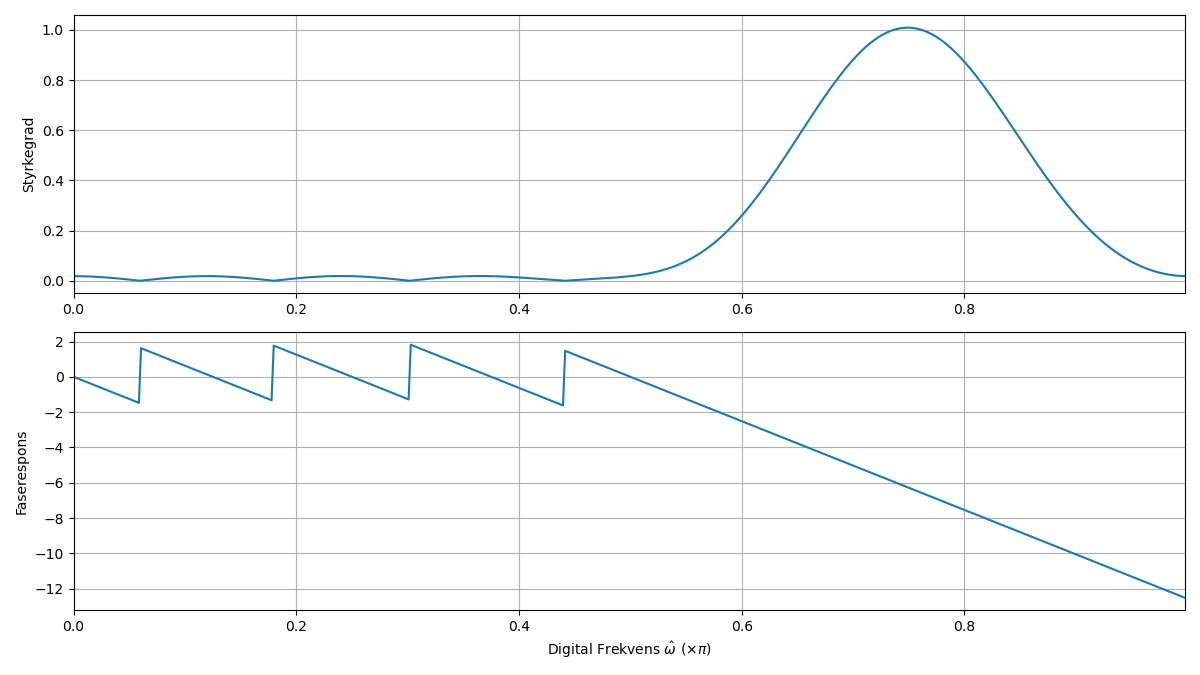

In [7]:
L = 17
hn_lp = np.ones(L)/L

n = np.arange(L)

hn_bp = 2*hn_lp*cos(3*pi/4*n)*sig.hamming(L)/sum(sig.hamming(L))*L

w, Hw = sig.freqz(hn_bp)

Hw_mag = np.abs(Hw)
Hw_phase = np.unwrap(np.angle(Hw))


#-------------
# Plotting av frekvensrespons
# ------------
plt.close(6); plt.figure(6)
plt.subplot(2,1,1)
plt.plot(w/pi, Hw_mag)
plt.ylabel('Styrkegrad')
plt.subplot(2,1,2)
plt.plot(w/pi, Hw_phase)
plt.ylabel('Faserespons')
plt.xlabel(r'Digital Frekvens $\hat{\omega} \ (\times \pi)$')

### Bruksområder

* Frekvensforskyhving av filtre sin frekvensrespons er et fundamentalt steg i designprosessen til mangedigitale filtre.
* Filterbanker

# Komplementærfiltre

* Komplementærfilteret $h_{comp}[n]$ til et filter $h[n]$ med styrkegradsrespons $|H(\hat{\omega})|$ er definert til å ha styrkegradsresponsen:

$$ |H_{comp}(\hat{\omega})| = 1 - |H(\hat{\omega})|$$

* For et FIR filter med group delay $D(\hat{\omega}) = K, \ \ K \in \mathbb{Z}$, vil komplementærfilteret være:

$$h_{comp}[n] = \delta[n-K] - h[n]$$

# Frekvensrespons komplementærfiltre

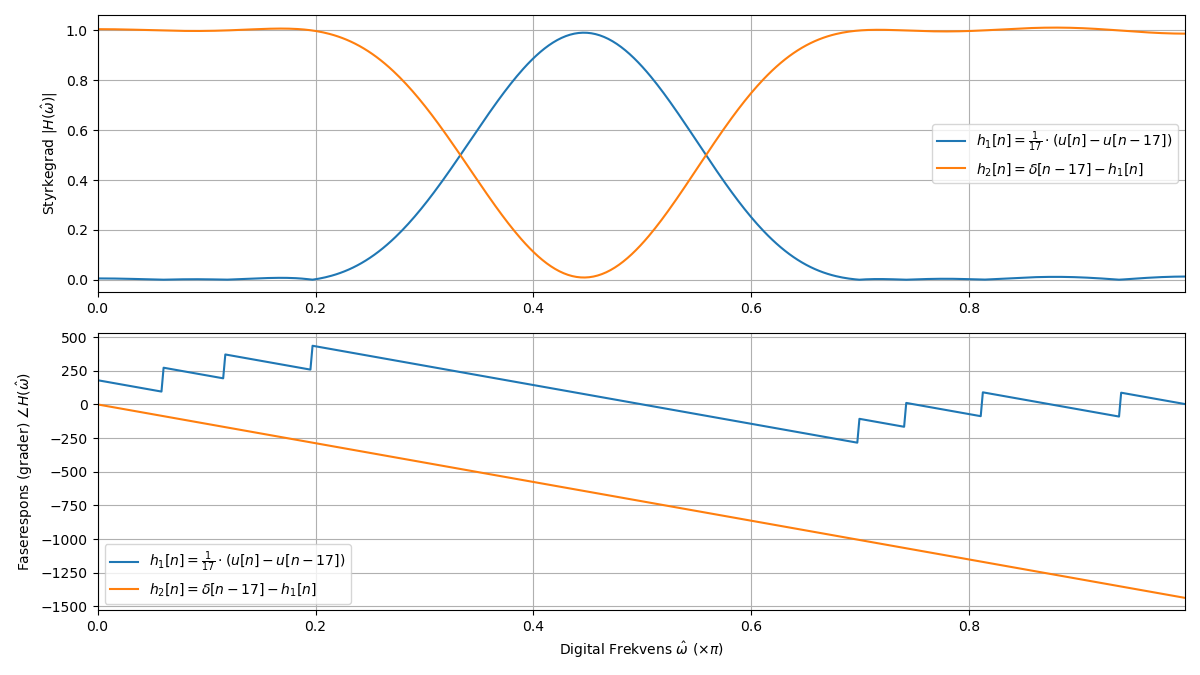

In [8]:
import scipy.signal as sig
L = 17
h1n = np.ones(L)*sig.hamming(L)/sum(sig.hamming(L)) # Modifisert middelverdifilter
delay = (L-1)//2 # NB! L må være oddetall
h1n *= 2*cos((np.arange(L)-delay)*1.4)

dn_delay = np.where(np.arange(L)==delay, 1.0, 0.0)
h2n = dn_delay - h1n # Komplementærfilter
w, H1w = sig.freqz(b = h1n)
w, H2w = sig.freqz(b = h2n)

H1w_amp = np.abs(H1w)
H1w_phase = np.unwrap(np.angle(H1w))
H2w_amp = np.abs(H2w)
H2w_phase = np.unwrap(np.angle(H2w))

#----------------------------
# Plotting av frekvensrespons
# ---------------------------
plt.close(7); plt.figure(7)
plt.subplot(2,1,1)
plt.plot(w/pi, H1w_amp, label=r'$h_1[n]=\frac{1}{%d}\cdot (u[n] - u[n-{%d}])$'%(L,L))
plt.plot(w/pi, H2w_amp, label=r'$h_2[n]=\delta[n-{%d}]- h_1[n]$'%(L))
plt.legend()
plt.ylabel(r'Styrkegrad $|H(\hat{\omega})|$')
plt.subplot(2,1,2)
plt.plot(w/pi, np.rad2deg(H1w_phase), label=r'$h_1[n]=\frac{1}{%d}\cdot (u[n] - u[n-{%d}])$'%(L,L))
plt.plot(w/pi, np.rad2deg(H2w_phase), label=r'$h_2[n]=\delta[n-{%d}]- h_1[n]$'%(L))
plt.ylabel(r'Faserespons (grader) $\angle H(\hat{\omega})$')
plt.xlabel(r'Digital Frekvens $\hat{\omega} \ (\times \pi)$')
plt.legend()

#### Komplementærfilter bruksområder:

* Sensor Fusion
* Båndsplitting av signal

# DTFT relevante egenskaper

* Mye av grunnlagene for frekvensanalyse baserer seg på de spesielle egenskapene til Diskret-tids Fouriertransformasjon (DTFT)

|Egenskap|Tidsdomene $x[n]$|Frekvensdomene $X\left(\hat{\omega}\right)$|
|:--|:----------:|:-----------------------:|
|Perdiodisistet i frekvensdomenet| | \begin{equation}X\left(\hat{\omega}+2\pi\right)=X\left(\hat{\omega}\right)\end{equation} |
|Linearitet | \begin{equation}a\cdot x_1[n] + b\cdot x_2[n] \end{equation}|\begin{equation}a\cdot X_1\left(\hat{\omega}\right) +b\cdot X_2\left(\hat{\omega}\right)\end{equation}|
|Komplekskonjugert symmetri| $x[n]$ er et reelt signal. | \begin{equation}X\left(-\hat{\omega}\right) = X^{*}\left(\hat{\omega}\right)\end{equation}|
|Tidsreversering | $x[-n]$ | \begin{equation}X\left(-\hat{\omega}\right)\end{equation}|
|Tidsforskyvning | $x[n-n_d]$ | \begin{equation}e^{-j\hat{\omega}\cdot n_d} \cdot X\left(\hat{\omega}\right)\end{equation}|
|Frekvensforskyvning | $x[n]\cdot e^{j\hat{\omega}_0\cdot n}$ | \begin{equation}X\left(\hat{\omega}-\hat{\omega}_0\right) \end{equation} | 
|Modulasjon | $x[n]\cdot \cos (\hat{\omega}_0 \cdot n)$ | \begin{equation}\frac{1}{2}X\left(\hat{\omega}-\hat{\omega}_0\right) + \frac{1}{2}X\left(\hat{\omega}+\hat{\omega}_0\right)\end{equation}| 
|Konvolusjon| $x[n]*h[n]$ | \begin{equation}X\left(\hat{\omega}\right)\cdot H\left(\hat{\omega}\right)\end{equation}|
|Multiplikasjon | $x[n]\cdot w[n]$ | \begin{equation}X\left(\hat{\omega}\right)*W\left(\hat{\omega}\right)\end{equation}|

# DTFT vanlige transformasjonspar

|Tidsdomene: $x[n]$ | Frekvensdomene: $X\left(\hat{\omega}\right)$ |
|:-:|:-:|
|$\delta[n]$|$1$|
|$\delta[n-n_d]$ | $e^{-j\hat{\omega}\cdot n_d}$ |
| $$u[n]-u[n-L]$$ | $$ \frac{\sin\left(\frac{1}{2}L\hat{\omega}\right)}{\sin\left(\frac{1}{2}\hat{\omega}\right)}\cdot e^{- j \cdot \frac{L-1}{2}\cdot \hat{\omega}} $$|
|$$\frac{\sin(\hat{\omega}_b\cdot n)}{\pi \cdot n}$$|$$\begin{cases}1, |\hat{\omega}|\leq \hat{\omega}_b\\ 0, \hat{\omega}_b < |\hat{\omega}| \leq \pi \end{cases}$$|
|$$a^n\cdot u[n], \ \ (|a|<1) $$| $$\frac{1}{1-a\cdot e^{-j\hat{\omega}}}$$|

# Oppsummering frekvensrespons
* Frekvensresponsen til et digitalt filter identifiseres ved å finne *frekvensinnholdet* $H(\hat{\omega})$ til filterets impulsrespons $h[n]$.
    * Kan utføres analytisk med *Diskret-Tids FourierTransformasjon*
    $$H\left(\hat{\omega} \right) = \text{DTFT}(h[n]) = \sum_{n=0}^{\infty} h[n]\cdot e^{-j\hat{\omega}\cdot n}$$
    * Kan utføres numerisk i `python` med funksjonen `scipy.signal.freqz()`:
```python
w, Hw = scipy.signal.freqz(hn)
```
* Frekvensesponsen $H(\hat{\omega})$ Deles opp i **Styrkegradsrespons** $|H(\hat{\omega})|$ og **Faserespons** $\angle H(\hat{\omega})$
    * **Styrkegradsrespons** forteller hvor mye en sinussekvens forsterkes/dempes, gitt digital frekvens $\hat{\omega}$.
    * **Faserespons** forteller hvor mange radianer sinussekvensen ut av filteret er forskjøvet i forhold til inngangssignalet, gitt digital frekvens $\hat{\omega}$.

* Frekvensresponsen beskriver forholdet mellom inngangssignal og utgangssignal til et filter i frekvensplanet.
$$Y\left(\hat{\omega} \right) = X\left(\hat{\omega} \right)\cdot H\left(\hat{\omega} \right) \leftrightarrow H\left(\hat{\omega} \right) = \frac{Y\left(\hat{\omega} \right)}{X\left(\hat{\omega} \right)}$$
* Forteller hvordan filteret vil påvirke et hvilket som helst sinusformet signal:
\begin{align}
x[n] &=  A\cdot \cos(\hat{\omega}_0 \cdot n + \phi)\\
& \downarrow \\
y[n] &= \left| H\left(\hat{\omega}_0 \right)\right| \cdot A\cdot \cos\left(\hat{\omega}_0 \cdot n + \phi + \angle H\left(\hat{\omega}_0 \right)\right)
\end{align}



* Vi kan gjøre endringer på frekvensresponsen til et filter ved å utføre enkelte operasjoner på impulsresponsen $h[n]$:
    * Modulasjon: $h[n] \cdot \cos(\hat{\omega}_0\cdot n) \rightarrow \frac{1}{2}(H(\hat{\omega}+\hat{\omega}_0) + H(\hat{\omega}+\hat{\omega}_0))$
    * Addisjon: $h_1[n] + h_2[n] \rightarrow H_1(\hat{\omega}) + H_2(\hat{\omega})$
    * Kaskade: $h_1[n]*h_2[n] \rightarrow H_1(\hat{\omega}) \cdot H_2(\hat{\omega})$
    * Komplementærfilter
        * Spesialtilfelle for FIR filtre med lineær faserespons
        * $\delta\left[n-\frac{M}{2}\right] - h[n] \rightarrow \left| 1 - H(\hat{\omega}) \right|, \ \ \ M = \text{filterorden}$

# Spørsmål?